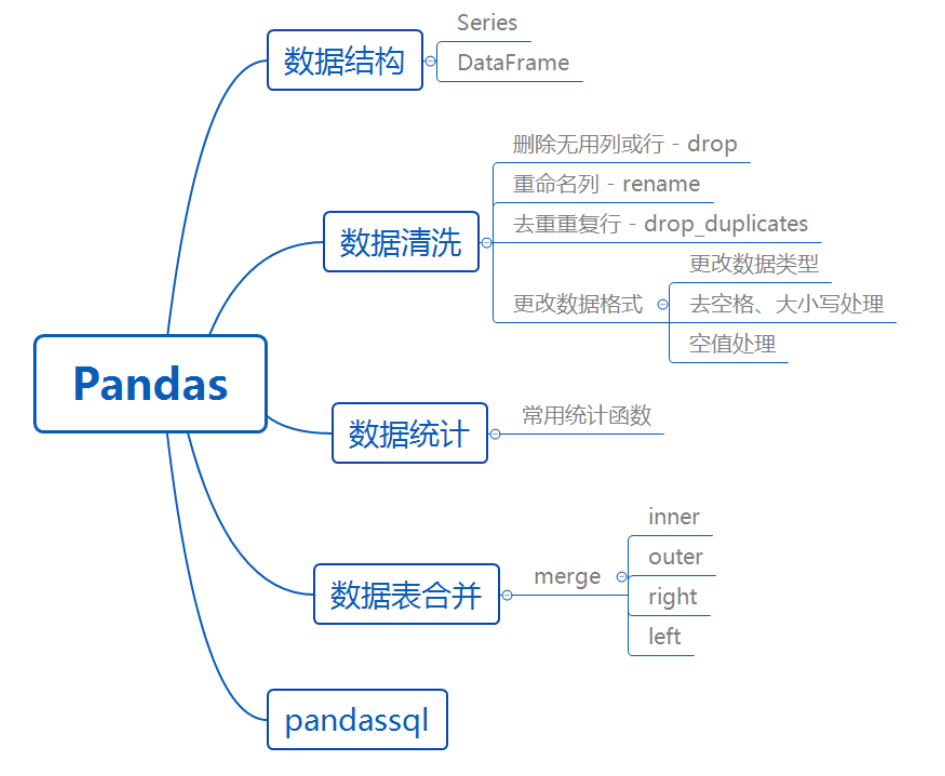

## 数据结构 Series , DataFrame

### Series是定长的字典序列

series在存储时，相当于两个ndarray，定长是它与不定长的字典结构的主要区别
两个基本属性，index和values，index默认是0,1,2,3递增，也可以指定索引，如 index=['x','y','z']

In [67]:
import pandas as pd
from pandas import Series, DataFrame
x1 = Series([7, 8, 9])
x2 = Series(data=[7, 8, 9], index=['x', 'y', 'z'])
dict = {'x': 7, 'y': 8, 'z': 9} #利用字典构建series
x3 = Series(dict)
print(x1)
print(x2)
print(x3)

0    7
1    8
2    9
dtype: int64
x    7
y    8
z    9
dtype: int64
x    7
y    8
z    9
dtype: int64


## DataFrame 数据结构类似数据库表

包含行索引和列索引，看成是由相同索引的Series组成的字典类型

In [17]:
import pandas as pd 
from pandas import Series,DataFrame
data = {'English':[55,23,78,34],'Math':[23,88,45,75],'Physical':[10,44,57,88]}
df1 = DataFrame(data)
df2 = DataFrame(data=data,index=['ZhangSan','LiSi','WangWu','ZhaoLiu'])
print (df1)
print (df2)

   English  Math  Physical
0       55    23        10
1       23    88        44
2       78    45        57
3       34    75        88
          English  Math  Physical
ZhangSan       55    23        10
LiSi           23    88        44
WangWu         78    45        57
ZhaoLiu        34    75        88


## 数据清洗

#### 删除不必要的行或列 - drop

In [27]:
import pandas as pd 
from pandas import Series,DataFrame

data = {'English':[55,23,78,34],'Math':[23,88,45,75],'Physical':[10,44,57,88]}
df = DataFrame(data=data,index=['ZhangSan','LiSi','WangWu','ZhaoLiu'])
df = df.drop(columns=['English'])
df = df.drop(index=["LiSi"])
print (df)

          Math  Physical
ZhangSan    23        10
LiSi        88        44
WangWu      45        57
ZhaoLiu     75        88


#### 重命名列名 - rename(columns=new_names,inplace=True)

In [40]:
import pandas as pd
from pandas import Series, DataFrame

data = {'English': [55, 23, 78, 34], 'Math': [
    23, 88, 45, 75], 'Physical': [10, 44, 57, 88]}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])
print('before:')
print(df)
df.rename(columns={'English': 'yingyu', 'Physical': 'wulil'},
          inplace=True)  # inplace 表示是否在原对象上修改
print('\r\nrename after:')
print(df)

before:
          English  Math  Physical
ZhangSan       55    23        10
LiSi           23    88        44
WangWu         78    45        57
ZhaoLiu        34    75        88

rename after:
          yingyu  Math  wulil
ZhangSan      55    23     10
LiSi          23    88     44
WangWu        78    45     57
ZhaoLiu       34    75     88


#### 去重重复行 - drop_duplicates

In [54]:
import pandas as pd
from pandas import Series, DataFrame

data = {'English': [55, 23, 23, 34], 'Math': [55, 88, 88, 55], 'Physical': [10, 44, 44, 55]}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])
print('before:')
print(df)

delrow_df = df.drop_duplicates(inplace=False)
print('\r\ndrop_duplicates rows after:')
print(delrow_df)

# subset 考虑重复发生在哪一列, keep 包含三个参数 first(默认) last False
delrow_df = df.drop_duplicates(subset=['Math'],keep='first',inplace=False)
print('\r\ndrop_duplicates rows after:')
print(delrow_df)

before:
          English  Math  Physical
ZhangSan       55    55        10
LiSi           23    88        44
WangWu         23    88        44
ZhaoLiu        34    55        55

drop_duplicates rows after:
          English  Math  Physical
ZhangSan       55    55        10
LiSi           23    88        44
ZhaoLiu        34    55        55

drop_duplicates rows after:
          English  Math  Physical
ZhangSan       55    55        10
LiSi           23    88        44


#### 更改数据格式

###### 1.更改数据类型 - astype

In [56]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data = {'English': [55, 23, 23, 34], 'Math': [55, 88, 88, 55], 'Physical': [10, 44, 44, 55]}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])

df['English'].astype('str') 
df['English'].astype(np.int64) 

ZhangSan    55
LiSi        23
WangWu      23
ZhaoLiu     34
Name: English, dtype: int64

###### 2.去除空格，大小写处理 - strip,upper,lower,title (python中的字符串格式化函数)

In [68]:
import pandas as pd
from pandas import Series, DataFrame

data = {'English': ['55$', '23', '23', '34'], 'Math': ['5a', '88', '8t', '55'], 'Physical': ['$10', '4n', '44$', 'a5']}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])

# Physical列去掉特殊符号
df['Physical']=df['Physical'].astype('str').str.strip('$')
print(df)
#全部大写
df.columns = df.columns.str.upper()
print(df)
#全部小写
df.columns = df.columns.str.lower()
print(df)
#首字母大写
df.columns = df.columns.str.title()
print(df)

         English Math Physical
ZhangSan     55$   5a       10
LiSi          23   88       4n
WangWu        23   8t       44
ZhaoLiu       34   55       a5
         ENGLISH MATH PHYSICAL
ZhangSan     55$   5a       10
LiSi          23   88       4n
WangWu        23   8t       44
ZhaoLiu       34   55       a5
         english math physical
ZhangSan     55$   5a       10
LiSi          23   88       4n
WangWu        23   8t       44
ZhaoLiu       34   55       a5
         English Math Physical
ZhangSan     55$   5a       10
LiSi          23   88       4n
WangWu        23   8t       44
ZhaoLiu       34   55       a5


想到一个不错的字符串处理办法,clean_strings的复用性更高

In [70]:
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title, str.lower,str.upper]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

###### 空值查找 - isnull

In [75]:
import pandas as pd
from pandas import Series, DataFrame

data = {'English': ['55$', '23', '23', '34'], 'Math': ['5a', '88', '8t',None ], 'Physical': ['$10', '4n', '44$', 'a5']}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])

df.isnull()
df.isnull().any()

English     False
Math         True
Physical    False
dtype: bool

自由度高的清洗函数 apply (我们可以自定义函数，达到灵活处理字符串的目的)

In [79]:
import pandas as pd
from pandas import Series, DataFrame

data = {'English': [55, 23, 23, 34], 'Math': [55, 88, 88, 55], 'Physical': [10, 44, 44, 55]}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])

def plus(df,n,m): 
    df['c1'] = (df['Math']+df['Physical']) - m 
    df['c2'] = (df['Math']+df['Physical']) - n 
    return df

df = df.apply(plus,axis=1,args=(2,3,))
print (df)

          English  Math  Physical   c1   c2
ZhangSan       55    55        10   62   63
LiSi           23    88        44  129  130
WangWu         23    88        44  129  130
ZhaoLiu        34    55        55  107  108


## 数据统计

In [18]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data = {'English': [55, 23, 23, 34], 'Math': [55, 88, 88, 55], 'Physical': [10, 44, 44, 55]}
df = DataFrame(data=data, index=['ZhangSan', 'LiSi', 'WangWu', 'ZhaoLiu'])

#count()统计个数，空值NaN不计算
df.count()
# describe()一次性输出多个统计结果 ，包括count,mean,std,min,max等
df.describe()
#min()最小值
df.min()
#max()最大值
df.max()
#sum() 求总和
df.sum()
#mean()平均值
df.mean()
#median()中位数
df.median()
#var()方差
df.var()
#std()标准差
df.std()
#argmin() 统计最小值的索引位置
np.argmin(df)

2

常用统计函数
![title](../images/PandasFunc.png)



## 数据表合并

In [23]:
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame({'name':['ZhangSan', 'LiSi', 'a', 'b', 'c'], 'c1':range(5)})
df2 = DataFrame({'name':['ZhangSan', 'LiSi', 'A', 'B', 'C'], 'c2':range(5)})

#指定列连接
df3 = pd.merge(df1,df2,on='name')
print(df3)

#内连接
df4 = pd.merge(df1,df2,how='inner')
print(df4)

#外连接
df5 = pd.merge(df1,df2,how='outer')
print(df5)

#左连接
df6 = pd.merge(df1,df2,how='left')
print(df6)

#右连接
df7 = pd.merge(df1,df2,how='right')
print(df7)

       name  c1  c2
0  ZhangSan   0   0
1      LiSi   1   1
       name  c1  c2
0  ZhangSan   0   0
1      LiSi   1   1
       name   c1   c2
0  ZhangSan  0.0  0.0
1      LiSi  1.0  1.0
2         a  2.0  NaN
3         b  3.0  NaN
4         c  4.0  NaN
5         A  NaN  2.0
6         B  NaN  3.0
7         C  NaN  4.0
       name  c1   c2
0  ZhangSan   0  0.0
1      LiSi   1  1.0
2         a   2  NaN
3         b   3  NaN
4         c   4  NaN
       name   c1  c2
0  ZhangSan  0.0   0
1      LiSi  1.0   1
2         A  NaN   2
3         B  NaN   3
4         C  NaN   4


## 用SQL方式操作Pandas

可以使用pandasql 来使用我们熟悉的sql语句来操作pandas，sqldf是主要函数，两个参数，其一是sql语句，其二是globals() 或 locals()，表示是否使用全局变量

In [6]:
import pandas as pd
from pandas import DataFrame
from pandasql import sqldf, load_meat, load_births

df1 = DataFrame({'name':['ZhangSan', 'LiSi', 'a', 'b', 'c'], 'c1':range(5)})
pysqldf = lambda sql: sqldf(sql, globals()) #定义一个匿名函数
sql = "select * from df1 where name ='ZhangSan'"
print (pysqldf(sql))

       name  c1
0  ZhangSan   0
